# <center> ¿COVID-19 una pandemia?
 Tamara Novoa <br>
Francisca Grandón <br> 
Carolina Salgado <br>
Cristófer Benavides <br>
Néstor Álvarez

## Introducción

COVID-19 o también conocido por su nombre común *corona virus*. Fue llamado pandemia por la OMS (Organización mundial de la salud) el pasado 11 de Marzo por el director de ésta organización Tedros Adhanom argumentando en parte su rápida expansión. 

Las consecuencias de la propagación de éste virus han sido catastróficas para la economía mundial, pues las numerosas cuarentenas y cierres de fronteras has significado una paralización cercana a total, de la economía mundial. Ha puesto al descubierto las capacidades de los distintos gobiernos del mundo para manejar complejas situaciones con efectos ramificados y no sólo eso, su espansión a causado miles de muertes en el mundo y ha colapsado sistemas de salud hasta en países como Estados unidos.

El virus comenzó el China y desde ahí se fue expandiendo a Europa para finalmente llegar a América a finales del primer trimestre del año. Sin embargo, en todo éste recorriedo que ha sido su expansión, se ha observado que ha tenido consecuencias muy diferentes para cada país al que ha llegado. Luego de casi tres meses de lucha, China fue capaz de controlarlo, *aplanando su curva de contagios*, Korea también ha sido capaz de controlarlo, pero países como Italia, España y Estados Unidos, son ejemplos de lugares en los que se ha salido por completo de control.

Eso es todo lo que nos muestran los medios masivos de comunicación: caos, descontrol, miles de muertes en todo el mundo, pero ¿Cuál es la verdadera estadística que hay detrás? ¿Cuáles son los verdaderos números? ¿Por qué hay diferencias estadísticas abismales en los medidores de la enermedad? Poniendo como ejemplo, países de los más estudiados, como Korea del sur, Islandia y Alemania dicen que la tasa de mortalidad del virus se sitúa entre $0,1$% y $0.4$%, lo cual es hasta veinte veces menos que lo publicado por la OMS.

Entonces, en el presente trabajo se busca corroborar ciertas estadísticas asociadas al virus y analizar si es que efectivamente hay diferencias entre países y ver si es que estas diferencias se traducen en patrones que en cierta forma expliquen la expansión del virus.

## Aborde inicial

## Análisis exploratorio

### Entendiendo los datos

Se utilizó la bases de datos más actualizada a la fecha , la que se encuentra en un <a href='https://github.com/CSSEGISandData/COVID-19'>respositorio de Githud de la universidad de Hopkings</a> que se va actualizando diariamente con el número de nuevos casos en el mundo. 

La base posee datos de contagiados, recuperados y muertos; además, cada uno de estos dataset posee las siguientes columnas: Proviencia, País, Lat, Long y las Fechas desde el 22 de Enero a la actualidad. <br>
Cabe destacar que esta base presentaba nula aparición de valores faltantes o NaN lo cual facilitó el trabajo posterior. 

### Visión gráfica de los datos

Se seleccionaron 6 países, considerados representativos de la situación mundial: China, Chile, España, Ecuador, Italia y Estados Unidos.

Para comenzar el análisis visual, lo primero fue tener una comparación de los países recién nombrados, según los casos confirmados. 
La idea era ver la forma de avance del virus. Sin embargo, ya que los países poseen poblaciones tan dispares como se observa en los gráficos de más abajo, fue imperiosa la normalización de sus casos. 

Para ésto, se tomaron dos formas de normalización: 
1. La primera corresponde a normalizar los casos según su población, donde se consultaron manualmente la población de cada país y con esto se pasó a porcentaje la cantidad de casos confirmados ( % =  100 * Casos / Población). En este gráfico se observa que el caso más crítico corresponde España, ya que tiene más contagiados para su población total, superando el 4%. 

Es posible ver, incluso antes degraficar, que China mantiene sus contagiados cercanos al 0% de su población, lo cual puede ser explicado por la gran cantidad de habitantes que tiene el país, siendo los contagiados un número insignificante en comparación.

<IPython.core.display.Javascript object>


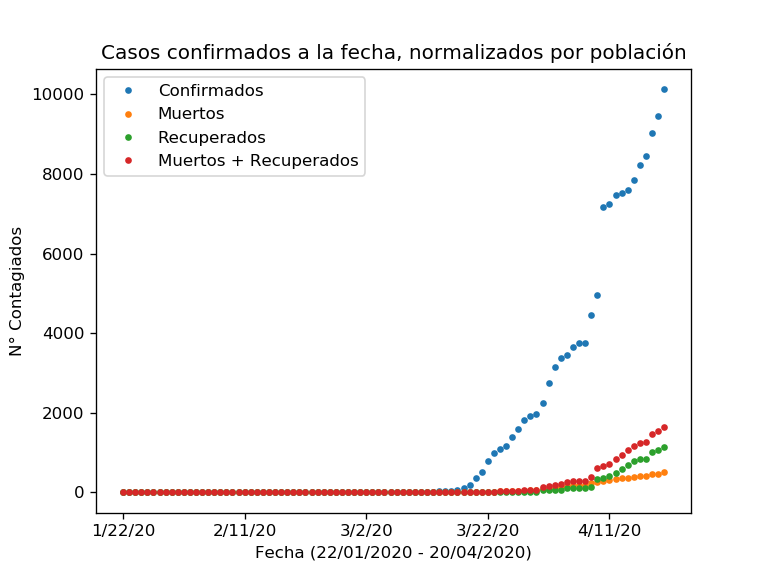

In [42]:
df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Contagiados')
plt.title('Casos confirmados a la fecha, normalizados por población')
plt.show()

2. La segunda forma corresponde a la visualización de los casos en escala logarítmica. En ella se observa que China logró contener sus casos a mediados de Febrero, miesntras que le resto de países no se puede definir si ya están aplanando la curva debido a que los cambios podrían ser temporales.

<IPython.core.display.Javascript object>


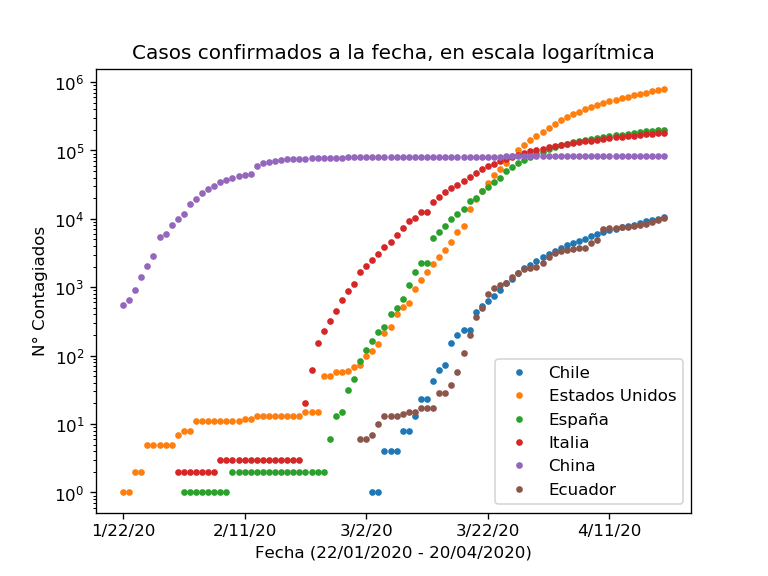

In [41]:
df2.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Contagiados')
plt.title('Casos confirmados a la fecha, en escala logarítmica')
plt.yscale('log')
plt.show()

Por otra parte, puesto que los casos confirmados no son suficientes como para hacer una comparación, para cada uno de los países seleccionados, se graficó la evolución que ha tenido el virus tanto en contagiados como en recuperados y muertos. 


De estos gráficos fue posible deducir que la evolución de los países con respecto al virus es bastante variada, teniendo tanto que el virus crece de manera desmedida como es el caso de Estados Unidos, que posee un crecimiento alto en países como España y Italia, otros que presentan un crecimiento sospechosamente bajo como es el caso de Chile y Ecuador (que además presentan condiciones económicas mucho menores a los países mencionados anteriormente) y por último el extraño caso de China que viendo las estadísticas da a pensar que está en proceso de recuperación dado que ya la mayoría de las personas que alguna vez se contagió ya se encuentra recuperada (como es posible ver en la imagen X)

Si bien no hubo datos corruptos o NaN, fue necesario realizar una revisión de que las series de tiempo sean crecientes, pues se usó como suposición que las curvas iniciales entregadas por el dataset son acumulativas.(esto lo podemos editar ya que no estamos seguros) 


Para ello se implementó la función revision(df), que recibe como input una serie o dataframe y entrega como output un arreglo de las mismas dimensiones que su input. Este resultado contiene unos y ceros, donde el primero representa la presencia de un valor anómalo en la posición (i,j), es decir que su valor es menor al del día anterior, mientras que el segundo denota que el valor es coherente o correcto. 

Dada la exploración inicial sólo se encontro un país con una curva aplanada que venría a ser el caso de China. En éste sentido, una de las tareas pendientes será analizar todos los países pertenecientes al dataset y ver si existen más comportamientos anómalos que los mencionados anteriormente.

Por último esta base de datos tiene la ventaja de que está siendo actualizada de manera constante, así a medida que transcurre el curso puede que se logren visualizar nuevos fenómenos de interés (como curvas oscilatorias o descendentes) o tratar de hacer predicciones con los datos presentes y ver si coinciden con los datos futuros.

### --------------------------------------------------------------------------------------------------------------------------------------------

## Anexos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, classification, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

/home/tamara/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### VISUALIZACIÓN DE DATASETS

#### 1) time_series_covid_19_confirmed

In [4]:
datos_global_confirmed = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',  sep=',')


In [5]:
datos_global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24


#### 2) time_series_covid_19_deaths

In [6]:
datos_global_deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',  sep=',')



In [7]:
datos_global_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18,18,21,23,25,30,30,30,33,36
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,23,24,25,26,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,275,293,313,326,336,348,364,367,375,384
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,26,29,29,31,33,33,35,35,36,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#### 3) time_series_covid_19_recovered

In [8]:
datos_global_recovered = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',  sep=',')

In [9]:
datos_global_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,32,32,40,43,54,99,112,131,135
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,197,217,232,248,251,277,283,302,314,327
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,460,591,601,691,708,783,846,894,1047,1099
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,71,128,128,128,169,169,191,205,235,248
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,5,5,5,5,6,6,6


### --------------------------------------------------------------------------------------------------------------------------------------------

### ELECCIÓN DE PAÍSES CLAVES

 Se toman los países: Chile, Estados, España, Italia, China

##### 1) Estados Unidos

In [10]:
USA=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='US')].iloc[:,4:]
USA.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
225,1,1,2,2,5,5,5,5,5,7,...,526396,555313,580619,607670,636350,667592,699706,732197,759086,784326


In [11]:
USATotal = USA.sum(axis = 0)
USATotal.head()

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
1/26/20    5
dtype: int64

##### 2) Chile

In [12]:
Chile=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Chile')].iloc[:,4:]
ChileTotal = Chile.sum(axis = 0)
Chile.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
48,0,0,0,0,0,0,0,0,0,0,...,6927,7213,7525,7917,8273,8807,9252,9730,10088,10507


##### 3) España

In [13]:
Espana=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Spain')].iloc[:,4:]
EspanaTotal = Espana.sum(axis = 0)
Espana.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
201,0,0,0,0,0,0,0,0,0,0,...,163027,166831,170099,172541,177644,184948,190839,191726,198674,200210


##### 4) Italia

In [14]:
Italia=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Italy')].iloc[:,4:]
ItaliaTotal = Italia.sum(axis = 0)
Italia.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
137,0,0,0,0,0,0,0,0,0,2,...,152271,156363,159516,162488,165155,168941,172434,175925,178972,181228


##### 5) China

In [15]:
China=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='China')].iloc[:,4:]
ChinaTotal = China.sum(axis = 0)
China.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
49,1,9,15,39,60,70,106,152,200,237,...,991,991,991,991,991,991,991,991,991,991
50,14,22,36,41,68,80,91,111,114,139,...,589,589,589,589,590,593,593,593,593,593
51,6,9,27,57,75,110,132,147,182,211,...,579,579,579,579,579,579,579,579,579,579
52,1,5,10,18,35,59,80,84,101,120,...,351,352,352,353,353,353,354,355,355,355
53,0,2,2,4,7,14,19,24,26,29,...,139,139,139,139,139,139,139,139,139,139


##### 6) Ecuador

In [16]:
Ecuador=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Ecuador')].iloc[:,4:]
EcuadorTotal = Ecuador.sum(axis = 0)
Ecuador.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
97,0,0,0,0,0,0,0,0,0,0,...,7257,7466,7529,7603,7858,8225,8450,9022,9468,10128


### --------------------------------------------------------------------------------------------------------------------------------------------

### REVISIÓN DE ANOMALÍAS

Se revisa que las curvas sean crecientes.

Para ello se implementó una funcion que busca el indice donde hay un valor menor al del dia anterior. Entrega como resultado un vector o matriz con unos y ceros. Un cero en la posicion (i,j) indica que el dato esta bien, caso contrario se muestra un uno.

In [17]:
#Entrega una matriz donde en la posicion (i,j) del dataframe hay un outlier.
#El criterio de outlier fue que el dia anterior se tengan menos casos.
def revision(df):
    filas=df.shape[0]
    col=df.shape[1]
    M=np.zeros((filas,col))  #Indica si en la posicion (i,j) hay un outlier (1 indica outlier, 0 no)
    for i in list(range(filas)):
        for j in list(range(col)):
            if j==0:  
                if df.iloc[i][j]>df.iloc[i][j+1]: #Si estoy en el primer valor y el que viene es mas chico
                    M[i][j+1]=1;
            elif df.iloc[i][j]<df.iloc[i][j-1]:  #Si estoy en (i,j) y el anterior es mas grande
                M[i][j]=1;                                                                
            #Se pueden agregar mas condiciones aca    
                
    return M   

#### Ejemplo: Estados unidos

In [18]:
USA_revision = pd.DataFrame(columns=USA.columns)
USA_revision.loc[0]=USA.sum(axis = 0)

revision(USA_revision)

China_revision = pd.DataFrame(columns=China.columns)
China_revision.loc[0]=China.sum(axis = 0)

revision(China_revision)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
China_revision = pd.DataFrame(columns=China.columns)
China_revision.loc[0]=China.sum(axis = 0)

revision(China_revision)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
Italia_revision = pd.DataFrame(columns=Italia.columns)
Italia_revision.loc[0]=Italia.sum(axis = 0)

revision(Italia_revision)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
Chile_revision = pd.DataFrame(columns=Chile.columns)
Chile_revision.loc[0]=Chile.sum(axis = 0)

revision(Chile_revision)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
Espana_revision = pd.DataFrame(columns=Espana.columns)
Espana_revision.loc[0]=Espana.sum(axis = 0)

revision(Espana_revision)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### --------------------------------------------------------------------------------------------------------------------------------------------

### OBERVACIÓN DE CURVAS POR PAÍS PARA CASOS CONFIRMADOS

<IPython.core.display.Javascript object>


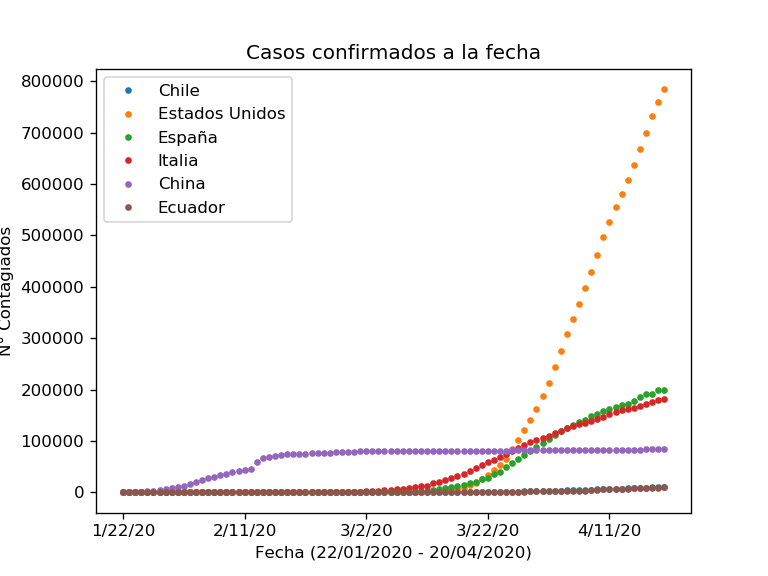

In [23]:
%matplotlib notebook
df = pd.DataFrame({

   'Chile': ChileTotal,

   'Estados Unidos': USATotal,
    
    'España': EspanaTotal,
    
   'Italia': ItaliaTotal,
    
    'China': ChinaTotal,
    
    'Ecuador': EcuadorTotal

   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Contagiados')
plt.title('Casos confirmados a la fecha')
plt.show()

#### Normalización de datos: Por Población

Se buscan manualmente los cantidad de habitantes de cada país

In [24]:
pobUSA = 331800000
pobChile = 19374000
pobEspana = 47183000
pobItalia = 60346000 
pobChina = 1403375000
pobEcuador = 17534000

In [25]:
normUSA = (100*USATotal)/pobUSA
normUSA

1/22/20    3.013864e-07
1/23/20    3.013864e-07
1/24/20    6.027728e-07
1/25/20    6.027728e-07
1/26/20    1.506932e-06
               ...     
4/16/20    2.012031e-01
4/17/20    2.108819e-01
4/18/20    2.206742e-01
4/19/20    2.287782e-01
4/20/20    2.363852e-01
Length: 90, dtype: float64

In [26]:
normChile = (100*ChileTotal)/pobChile
normChina = (100*ChinaTotal)/pobChina
normItalia = (100*ItaliaTotal)/pobItalia
normEspana = (100*EspanaTotal)/pobEspana
normEcuador = (100*EcuadorTotal)/pobEcuador

<IPython.core.display.Javascript object>


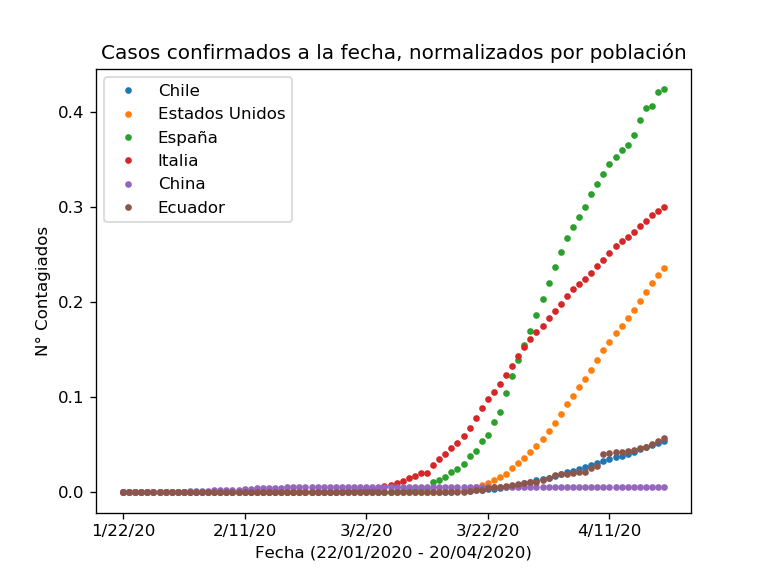

In [27]:
%matplotlib notebook
df = pd.DataFrame({

   'Chile': normChile,

   'Estados Unidos': normUSA,
    
    'España': normEspana,
    
   'Italia': normItalia,
    
    'China': normChina,
    
    'Ecuador': normEcuador

   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Contagiados')
plt.title('Casos confirmados a la fecha, normalizados por población')
plt.show()

#### Normalización de datos: Escala Logarítmica

<IPython.core.display.Javascript object>


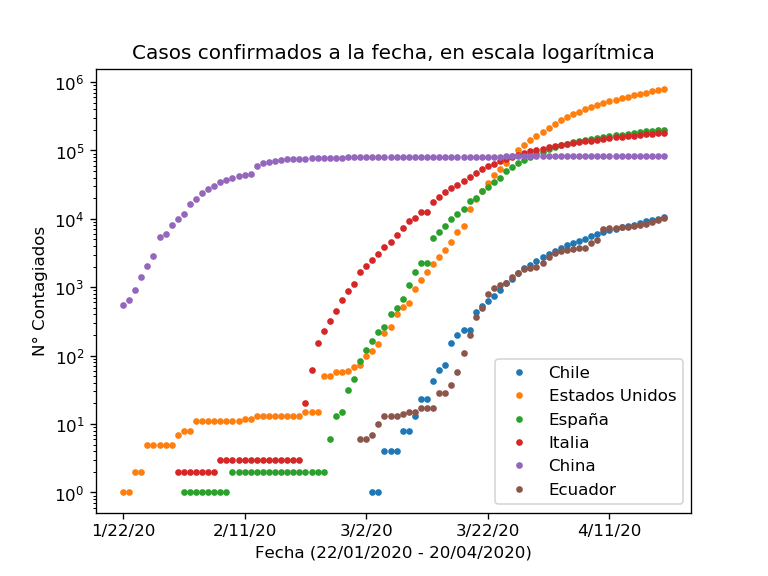

In [28]:
%matplotlib notebook
df2 = pd.DataFrame({

   'Chile': ChileTotal,

   'Estados Unidos': USATotal,
    
    'España': EspanaTotal,
    
   'Italia': ItaliaTotal,
    
    'China': ChinaTotal,
    
    'Ecuador': EcuadorTotal

   }, index=China.keys())

df2.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Contagiados')
plt.title('Casos confirmados a la fecha, en escala logarítmica')
plt.yscale('log')
plt.show()

### --------------------------------------------------------------------------------------------------------------------------------------------

#### COMPARACIÓN DE CASOS POR PAÍS

##### 1. Chile

In [29]:
ChileConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Chile')].iloc[:,4:]
ChileTotalConf = ChileConf.sum(axis = 0)

ChileDeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='Chile')].iloc[:,4:]
ChileTotalDeath = ChileDeath.sum(axis = 0)

ChileRecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='Chile')].iloc[:,4:]
ChileTotalRecov = ChileRecov.sum(axis = 0)

ChileTotalRecovDeath = ChileTotalDeath + ChileTotalRecov

<IPython.core.display.Javascript object>


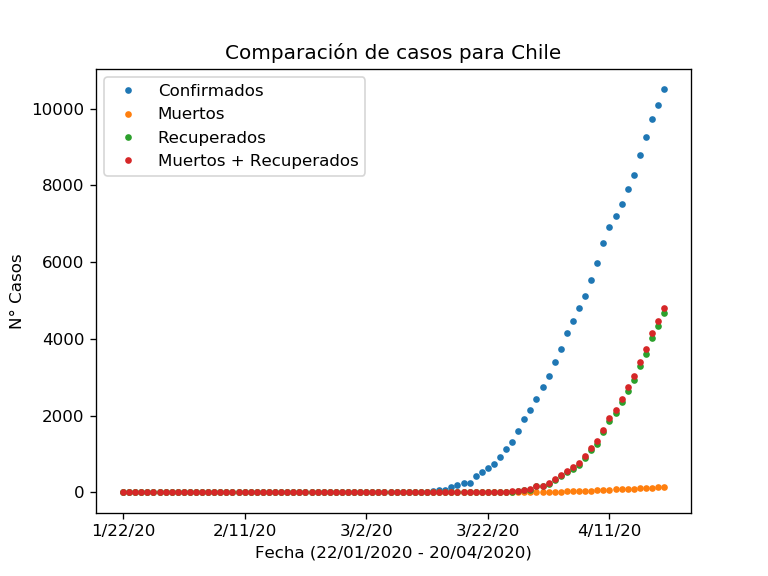

In [30]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': ChileTotalConf,
    'Muertos': ChileTotalDeath,
    'Recuperados': ChileTotalRecov,
    'Muertos + Recuperados': ChileTotalRecovDeath


   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para Chile')
plt.show()

##### 2. China

In [31]:
ChinaConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='China')].iloc[:,4:]
ChinaTotalConf = ChinaConf.sum(axis = 0)

ChinaDeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='China')].iloc[:,4:]
ChinaTotalDeath = ChinaDeath.sum(axis = 0)

ChinaRecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='China')].iloc[:,4:]
ChinaTotalRecov = ChinaRecov.sum(axis = 0)

ChinaTotalRecovDeath = ChinaTotalDeath + ChinaTotalRecov

<IPython.core.display.Javascript object>


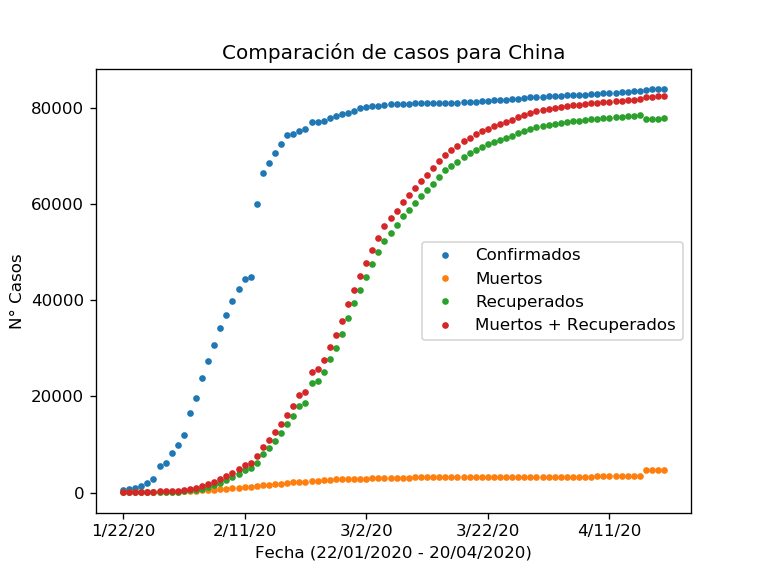

In [32]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': ChinaTotalConf,
    'Muertos': ChinaTotalDeath,
    'Recuperados': ChinaTotalRecov,
    'Muertos + Recuperados': ChinaTotalRecovDeath


   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para China')
plt.show()

##### 3. Estados Unidos

In [33]:
USAConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='US')].iloc[:,4:]
USATotalConf = USAConf.sum(axis = 0)

USADeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='US')].iloc[:,4:]
USATotalDeath = USADeath.sum(axis = 0)

USARecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='US')].iloc[:,4:]
USATotalRecov = USARecov.sum(axis = 0)

USATotalRecovDeath = USATotalDeath + USATotalRecov

<IPython.core.display.Javascript object>


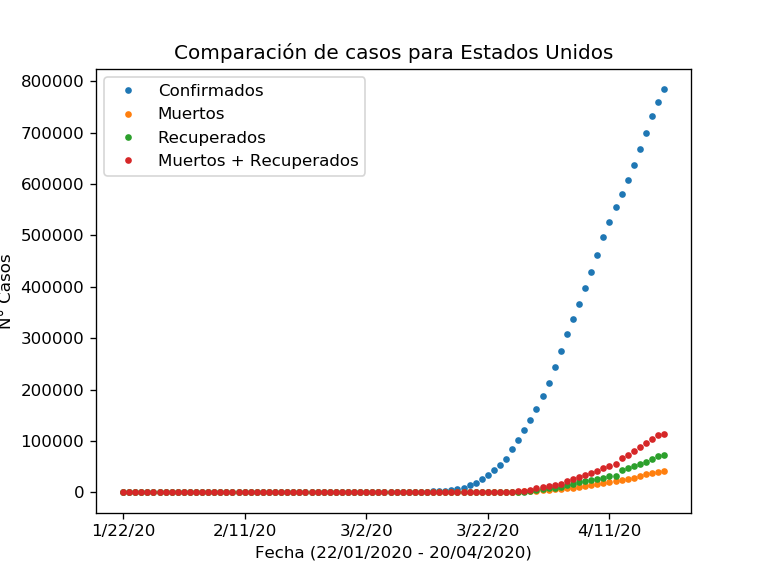

In [34]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': USATotalConf,
    'Muertos': USATotalDeath,
    'Recuperados': USATotalRecov,
    'Muertos + Recuperados': USATotalRecovDeath


   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para Estados Unidos')
plt.show()

##### 4. España

In [35]:
SpainConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Spain')].iloc[:,4:]
SpainTotalConf = SpainConf.sum(axis = 0)

SpainDeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='Spain')].iloc[:,4:]
SpainTotalDeath = SpainDeath.sum(axis = 0)

SpainRecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='Spain')].iloc[:,4:]
SpainTotalRecov = SpainRecov.sum(axis = 0)

SpainTotalRecovDeath = SpainTotalDeath + SpainTotalRecov

<IPython.core.display.Javascript object>


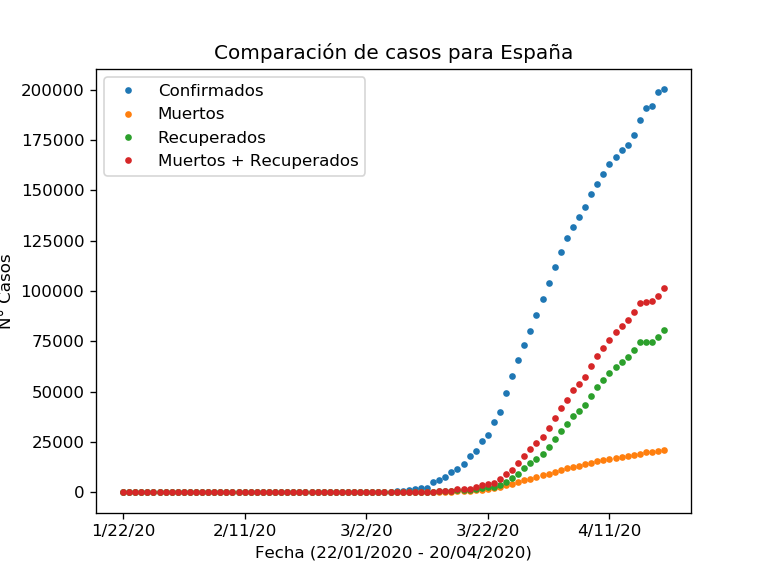

In [36]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': SpainTotalConf,
    'Muertos': SpainTotalDeath,
    'Recuperados': SpainTotalRecov,
    'Muertos + Recuperados': SpainTotalRecovDeath


   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para España')
plt.show()

##### 5. Italia

In [37]:
ItaliaConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Italy')].iloc[:,4:]
ItaliaTotalConf = ItaliaConf.sum(axis = 0)

ItaliaDeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='Italy')].iloc[:,4:]
ItaliaTotalDeath = ItaliaDeath.sum(axis = 0)

ItaliaRecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='Italy')].iloc[:,4:]
ItaliaTotalRecov = ItaliaRecov.sum(axis = 0)

ItaliaTotalRecovDeath = ItaliaTotalDeath + ItaliaTotalRecov

<IPython.core.display.Javascript object>


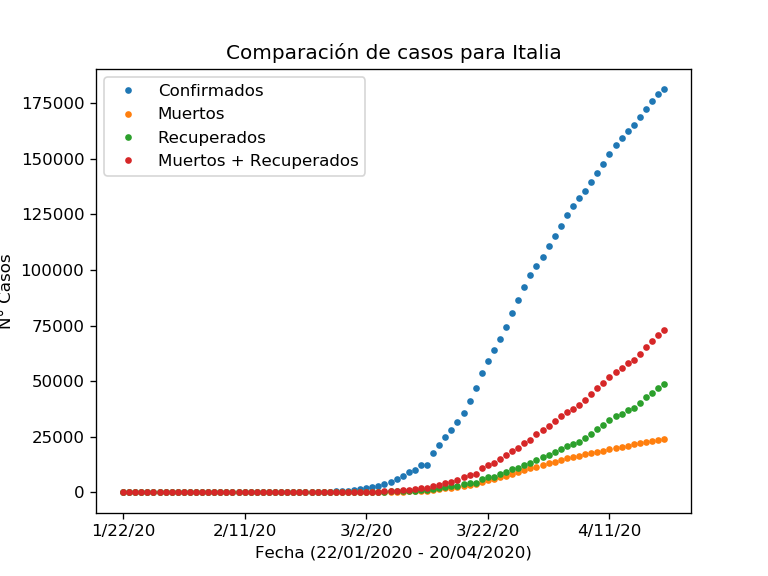

In [38]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': ItaliaTotalConf,
    'Muertos': ItaliaTotalDeath,
    'Recuperados': ItaliaTotalRecov,
    'Muertos + Recuperados': ItaliaTotalRecovDeath


   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para Italia')
plt.show()

##### 6. Ecuador

In [39]:
EcuadorConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Ecuador')].iloc[:,4:]
EcuadorTotalConf = EcuadorConf.sum(axis = 0)

EcuadorDeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='Ecuador')].iloc[:,4:]
EcuadorTotalDeath = EcuadorDeath.sum(axis = 0)

EcuadorRecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='Ecuador')].iloc[:,4:]
EcuadorTotalRecov = EcuadorRecov.sum(axis = 0)

EcuadorTotalRecovDeath = EcuadorTotalDeath + EcuadorTotalRecov

<IPython.core.display.Javascript object>


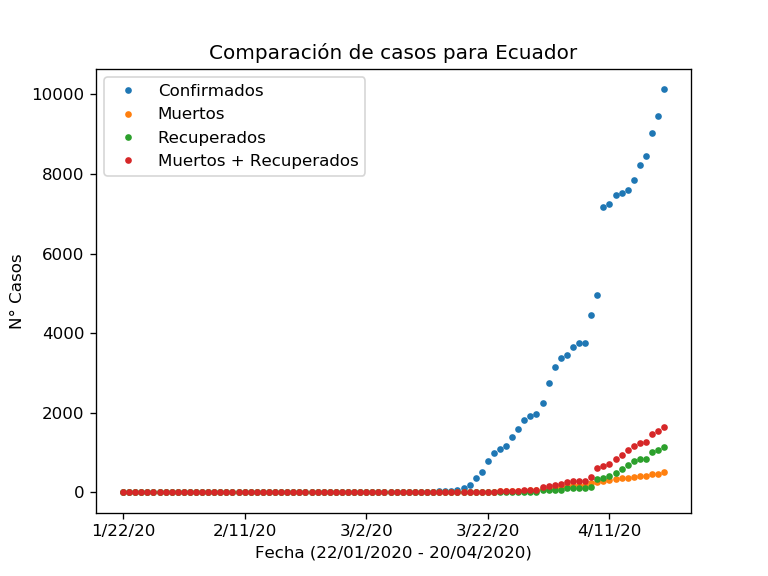

In [40]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': EcuadorTotalConf,
    'Muertos': EcuadorTotalDeath,
    'Recuperados': EcuadorTotalRecov,
    'Muertos + Recuperados': EcuadorTotalRecovDeath
   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para Ecuador')
plt.show()

### --------------------------------------------------------------------------------------------------------------------------------------------